In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
x=np.array([[1],[2],[3],[4],[5],[7],[8],[9],[10]])
y=np.array([0,0,0,0,1,1,1,1,1])

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [6]:
y_pred=model.predict(x_test)
print("Predictions: ",y_pred)

Predictions:  [1 0]


In [7]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


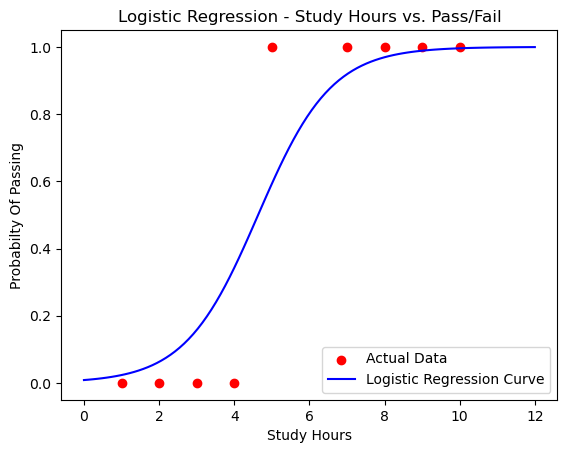

In [8]:
x_range=np.linspace(0,12,100).reshape(-1,1)
y_prob=model.predict_proba(x_range)[:,1]

plt.scatter(x,y,color='red',label='Actual Data')
plt.plot(x_range,y_prob,color='blue',label='Logistic Regression Curve')
plt.xlabel('Study Hours')
plt.ylabel('Probabilty Of Passing')
plt.title('Logistic Regression - Study Hours vs. Pass/Fail')
plt.legend()
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc

In [10]:
import pandas as pd
file_path='heart.csv'
df=pd.read_csv(file_path)
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  

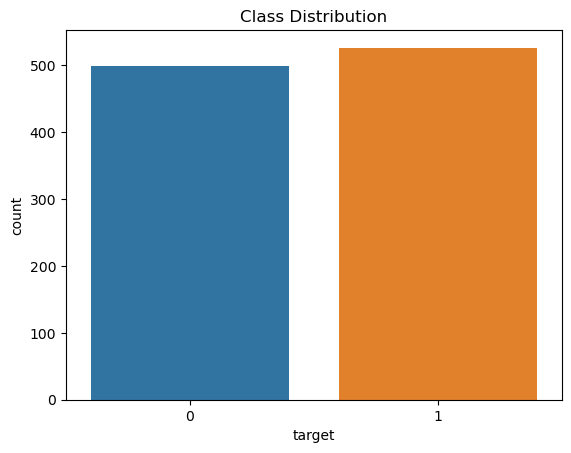

In [11]:
print(df.isnull().sum())
print(df.describe())
sns.countplot(x=df['target'])
plt.title('Class Distribution')
plt.show()

In [12]:
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

Acuuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



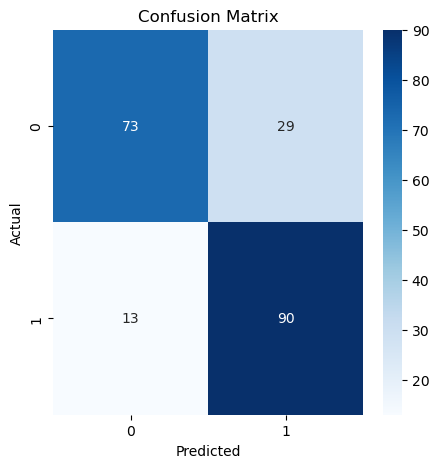

In [14]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Acuuracy: {accuracy:.2f}")
print("\nClassification Report:\n",classification_report(y_test,y_pred))
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
df=pd.read_csv('social_network_ads.csv')

In [16]:
print(df.head())
print(df.describe())
print(df.info())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Nul

In [17]:
print(df.isnull().sum())


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


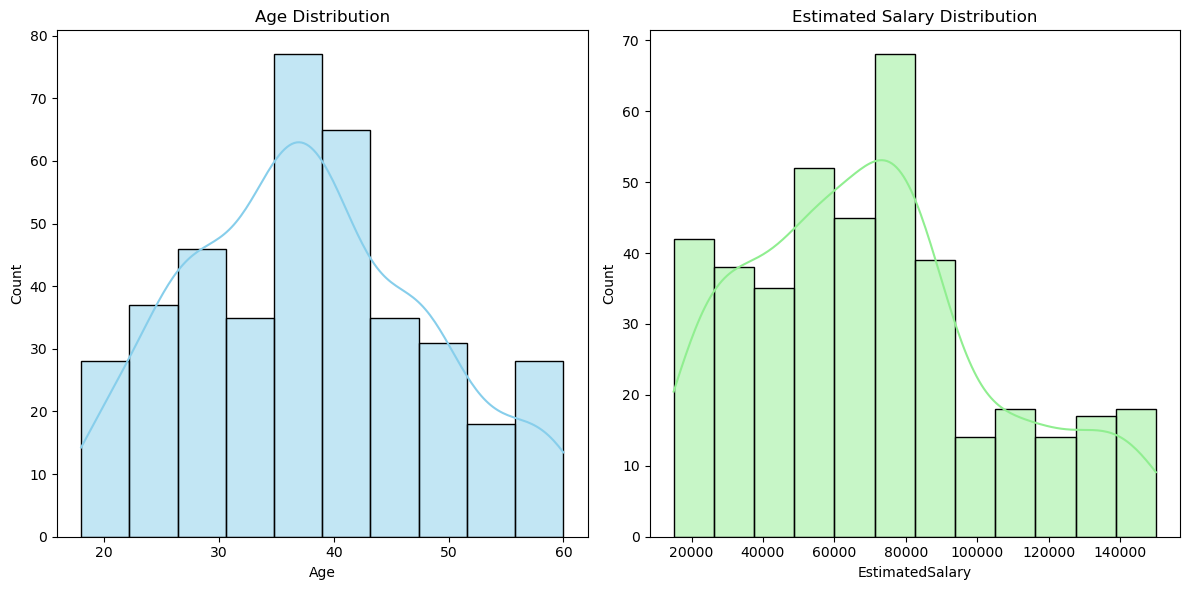

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['EstimatedSalary'], kde=True, color='lightgreen')
plt.title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()


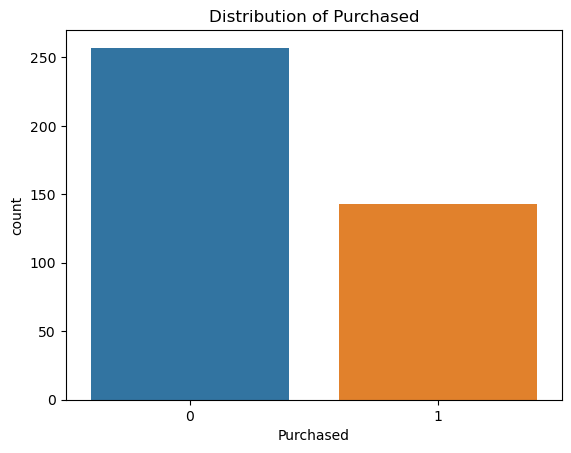

In [19]:
sns.countplot(x='Purchased', data=df)
plt.title('Distribution of Purchased')
plt.show()


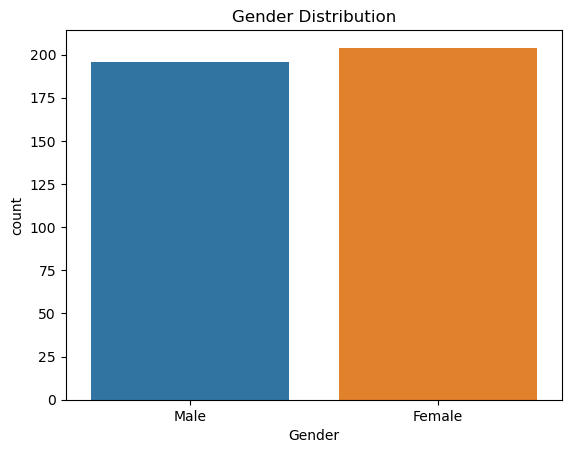

In [20]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


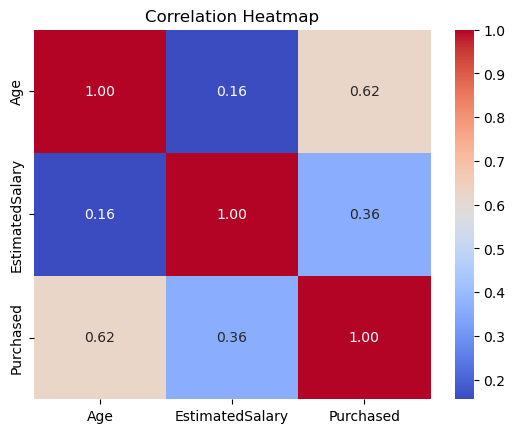

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


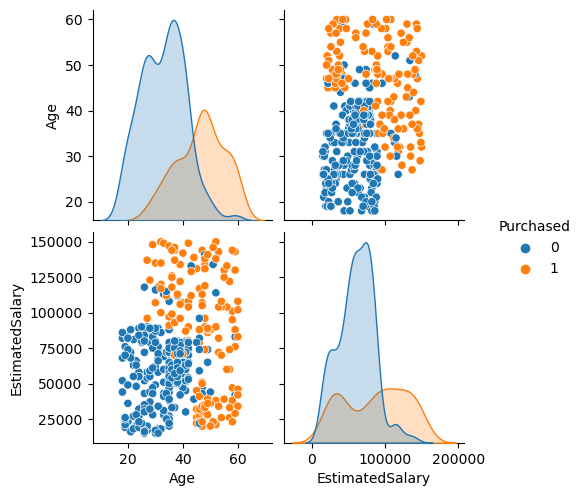

In [21]:
correlation = df[['Age', 'EstimatedSalary', 'Purchased']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df[['Age', 'EstimatedSalary', 'Purchased']], hue='Purchased')
plt.show()


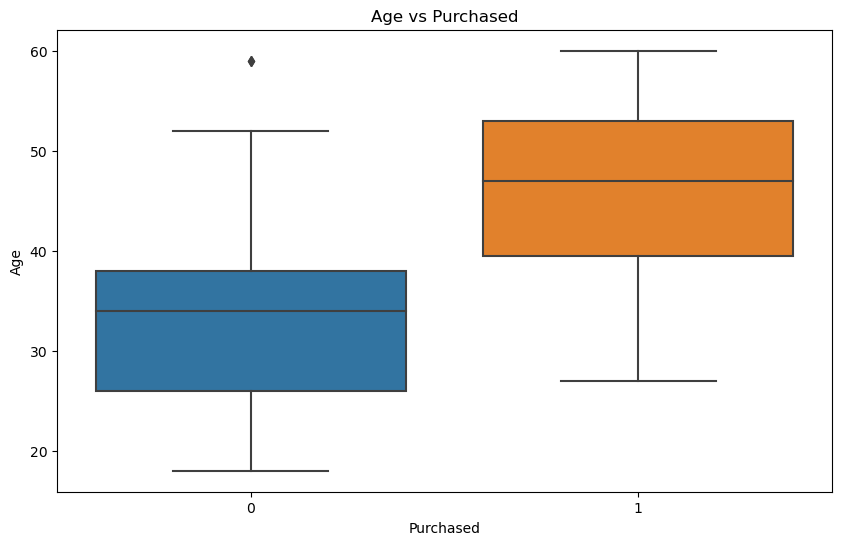

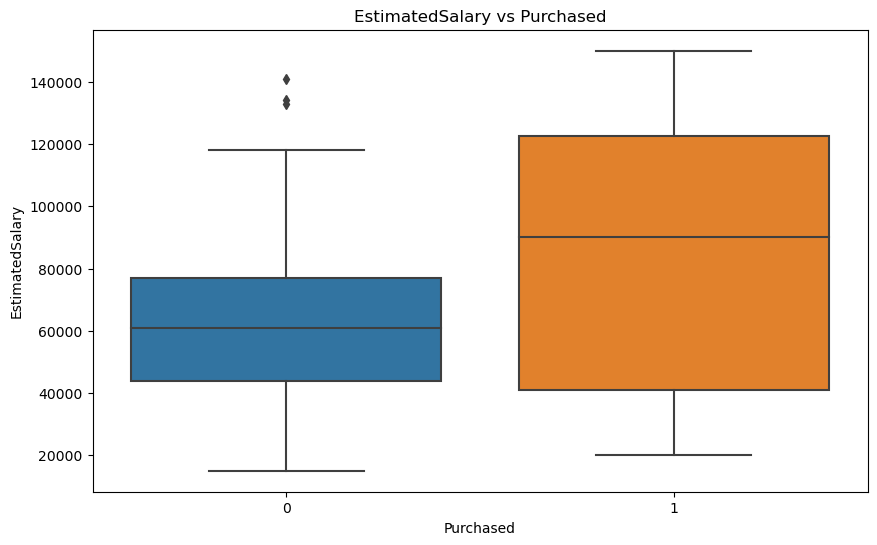

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchased', y='Age', data=df)
plt.title('Age vs Purchased')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df)
plt.title('EstimatedSalary vs Purchased')
plt.show()


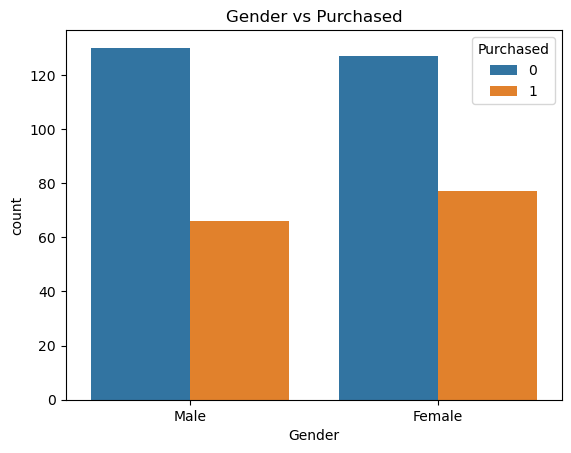

In [23]:
sns.countplot(x='Gender', hue='Purchased', data=df)
plt.title('Gender vs Purchased')
plt.show()

In [25]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [54]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [55]:
y_pred=classifier.predict(x_test)

<Axes: >

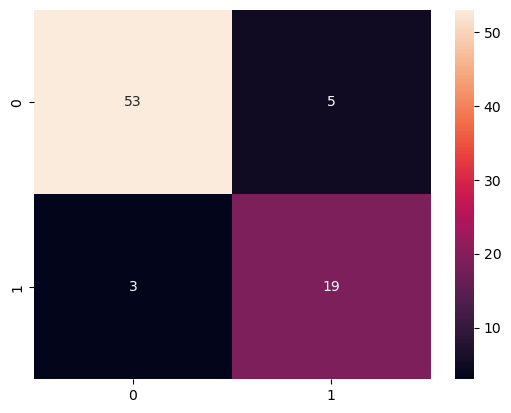

In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9